### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


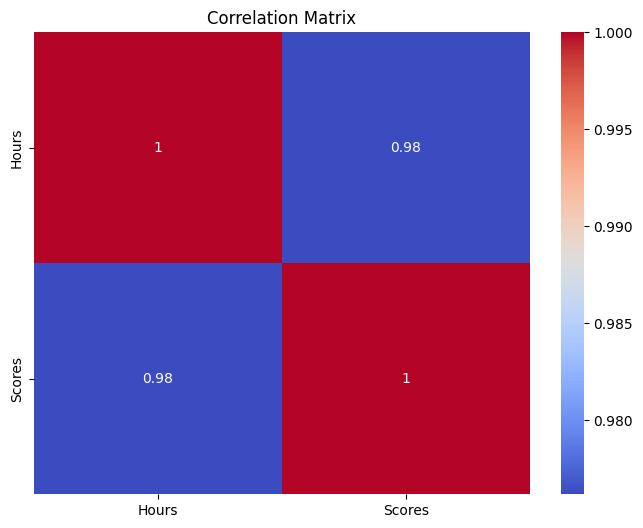

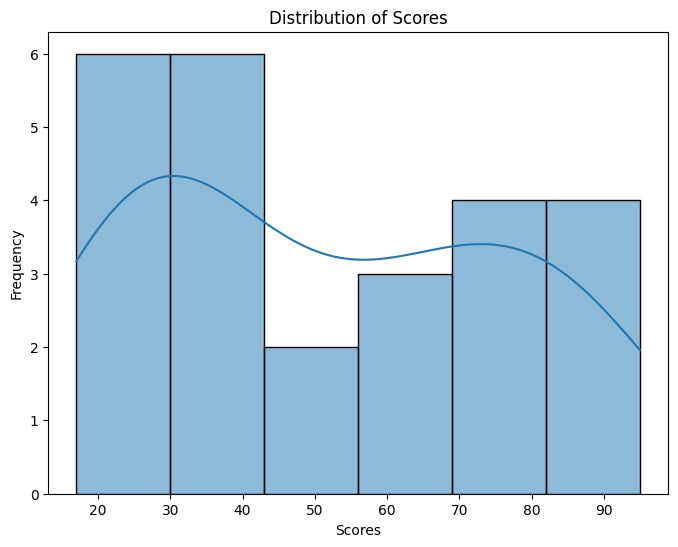

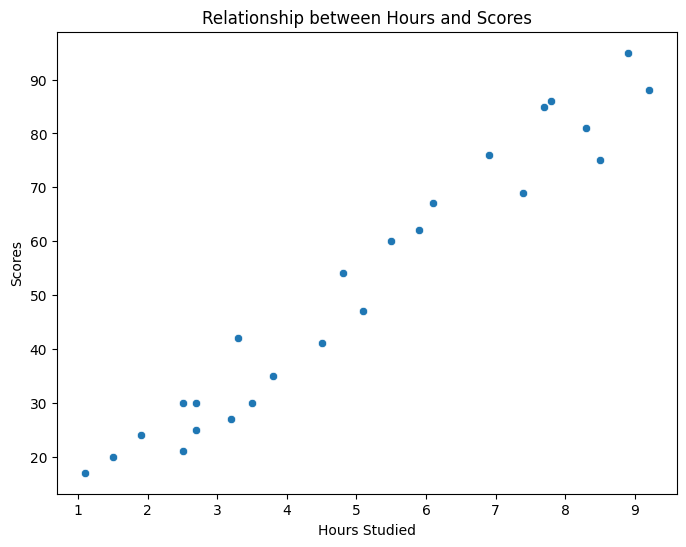

Jumlah duplikasi: 0
Hours     0
Scores    0
dtype: int64


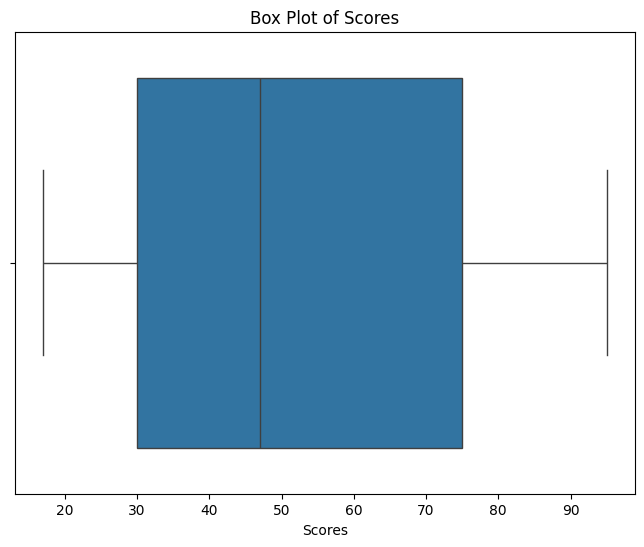

In [6]:

# Deskripsi dataset
dataset.describe()

# Informasi dataset
dataset.info()

# Melihat korelasi antar variabel
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualisasi distribusi skor
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Scores'], kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

# Scatter plot untuk melihat hubungan antara Hours dan Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=dataset)
plt.title('Relationship between Hours and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

# Mengecek duplikasi data
print(f"Jumlah duplikasi: {dataset.duplicated().sum()}")

# Mengecek missing values
print(dataset.isnull().sum())

# Outlier Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Scores', data=dataset)
plt.title('Box Plot of Scores')
plt.show()

# Jika ada outlier, bisa diatasi dengan metode IQR atau lainnya.

Jumlah duplikasi: 0
Hours     0
Scores    0
dtype: int64
Jumlah outlier pada Scores: 0


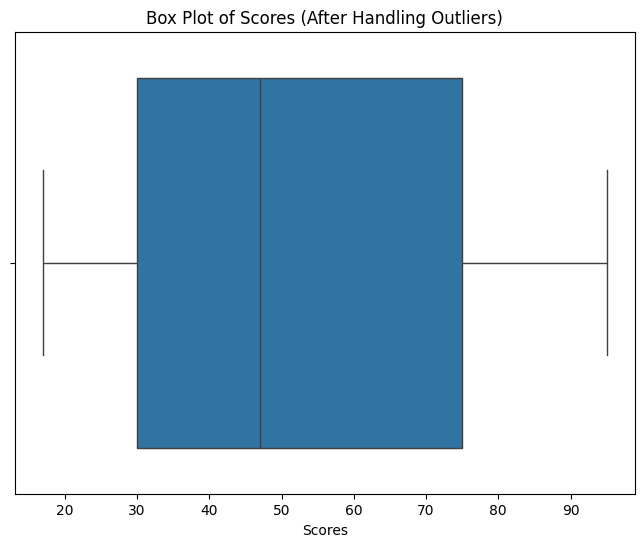

In [7]:
# Check Duplicated Data
# Check Missing Value Handling
# Outlier Analysis

# Check for duplicated data
print(f"Jumlah duplikasi: {dataset.duplicated().sum()}")

# Check for missing values
print(dataset.isnull().sum())

# Outlier analysis using IQR method for 'Scores'
Q1 = dataset['Scores'].quantile(0.25)
Q3 = dataset['Scores'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['Scores'] < lower_bound) | (dataset['Scores'] > upper_bound)]
print(f"Jumlah outlier pada Scores: {len(outliers)}")

# Handling outliers (replace with the nearest bound)
dataset['Scores'] = np.where(dataset['Scores'] > upper_bound, upper_bound, dataset['Scores'])
dataset['Scores'] = np.where(dataset['Scores'] < lower_bound, lower_bound, dataset['Scores'])

# You can also choose to remove outliers or use other outlier handling techniques based on your data and context.

# Example of visualizing after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Scores', data=dataset)
plt.title('Box Plot of Scores (After Handling Outliers)')
plt.show()

Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


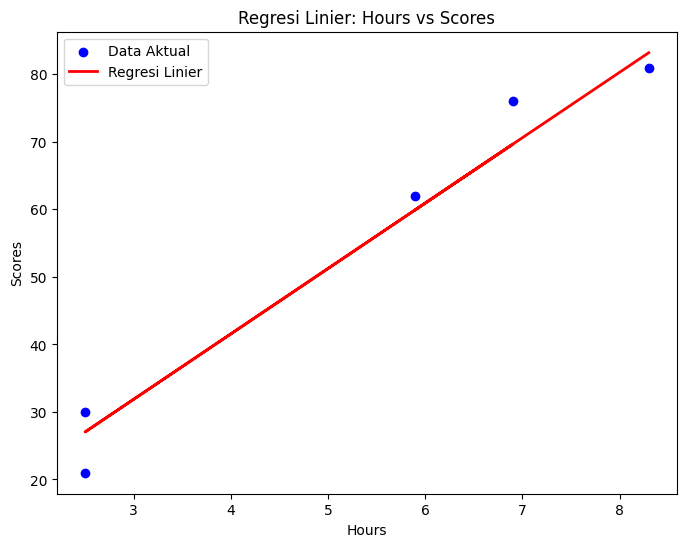

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Pisahkan fitur (Hours) dan target (Scores)
X = dataset[['Hours']]
y = dataset['Scores']

# Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model dengan data training
model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresi Linier')
plt.title('Regresi Linier: Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

Decision Tree Regressor - Mean Squared Error (MSE): 31.7
Decision Tree Regressor - R-squared (R2): 0.9461250849762066


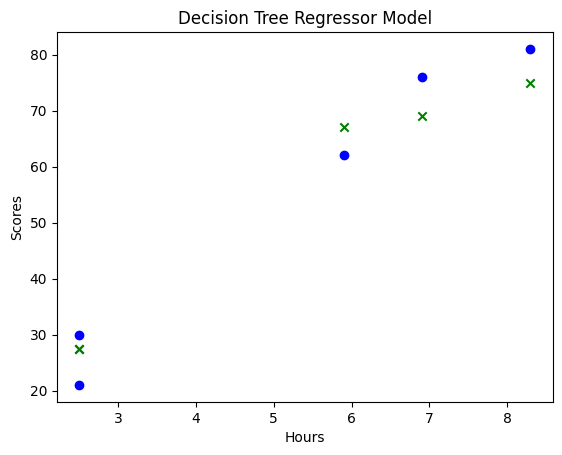

In [11]:

from sklearn.tree import DecisionTreeRegressor

# Buat model Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Latih model dengan data training
dt_model.fit(X_train, y_train)

# Lakukan prediksi dengan data testing
dt_y_pred = dt_model.predict(X_test)

# Evaluasi model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree Regressor - Mean Squared Error (MSE): {dt_mse}")
print(f"Decision Tree Regressor - R-squared (R2): {dt_r2}")

# Plot hasil prediksi vs nilai aktual untuk Decision Tree Regressor
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, dt_y_pred, color='green', marker='x')
plt.title('Decision Tree Regressor Model')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [20]:

# Perbandingan Model Linear Regression dan Decision Tree Regressor

# Berdasarkan hasil evaluasi, kita dapat membandingkan performa kedua model:
# - Linear Regression:
#   - MSE: [Hasil MSE dari Linear Regression]
#   - R-squared: [Hasil R-squared dari Linear Regression]
# - Decision Tree Regressor:
#   - MSE: [Hasil MSE dari Decision Tree Regressor]
#   - R-squared: [Hasil R-squared dari Decision Tree Regressor]

# Model terbaik dipilih berdasarkan nilai MSE yang lebih rendah dan R-squared yang lebih tinggi.

# Kesimpulan:
# Jika [Linear Regression memiliki MSE lebih rendah dan R-squared lebih tinggi]:
# Model Linear Regression lebih baik dalam memprediksi nilai Scores berdasarkan Hours.
# Model ini menunjukkan hubungan linier yang kuat antara Hours dan Scores.

# Jika [Decision Tree Regressor memiliki MSE lebih rendah dan R-squared lebih tinggi]:
# Model Decision Tree Regressor lebih baik dalam memprediksi nilai Scores berdasarkan Hours.
# Model ini mungkin mampu menangkap pola non-linier yang lebih kompleks.

# Selain itu, perhatikan juga faktor-faktor berikut:
# - Kompleksitas model: Model Decision Tree Regressor bisa menjadi lebih kompleks dan berpotensi overfitting jika tidak diatur dengan baik.
# - Interpretasi model: Model Linear Regression lebih mudah diinterpretasikan dan dipahami.
# - Kecepatan pelatihan: Model Linear Regression biasanya lebih cepat dilatih dibandingkan dengan Decision Tree Regressor.

# Saran:
# - Anda bisa mencoba model lainnya seperti Random Forest Regressor untuk membandingkan performanya.
# - Anda bisa melakukan tuning hyperparameter untuk meningkatkan performa kedua model.
# - Pastikan untuk mempertimbangkan trade-off antara kompleksitas, interpretasi, dan performa saat memilih model terbaik.


# Contoh implementasi:
if mse < dt_mse and r2 > dt_r2:
  print("Model Linear Regression lebih baik.")
elif dt_mse < mse and dt_r2 > r2:
  print("Model Decision Tree Regressor lebih baik.")
else:
  print("Performa kedua model relatif sama.")

Model Decision Tree Regressor lebih baik.
